In [1]:
import pandas as pd
import configparser
import matplotlib.pyplot as plt
%matplotlib inline

from Wrapper import *
from Influx_Dataframe_Client import Influx_Dataframe_Client

# Data Sources

## csv files

In [2]:
# main_obj = Wrapper()
# main_obj.read_json(file_name='input_csv.json')
# main_obj.search(file_name='input_csv.json')

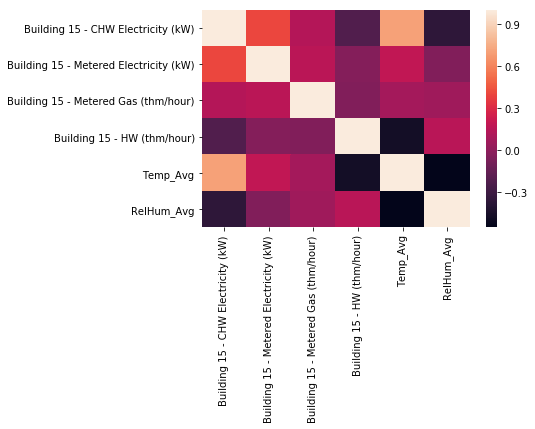

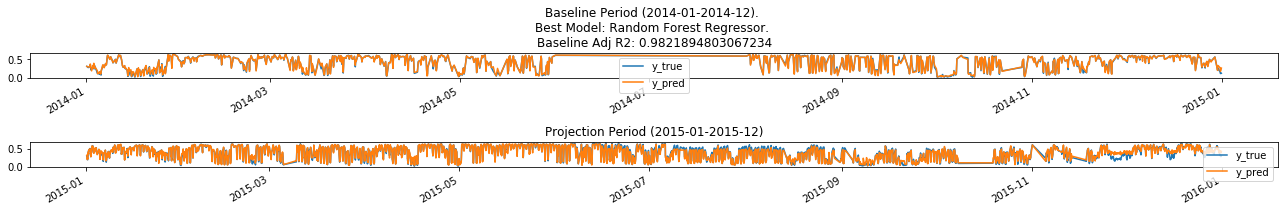

In [3]:
def func(X, y):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import cross_val_score
    model = LinearRegression()
    model.fit(X, y)
    return model.predict(X)

main_obj = Wrapper()

imported_data = main_obj.import_data(folder_name='../data/', head_row=[5,5,0], 
                                     save_file=False)

cleaned_data = main_obj.clean_data(imported_data, high_bound=9998,
                                rename_col=['OAT','RelHum_Avg', 'CHW_Elec', 'Elec', 'Gas', 'HW_Heat'],
                                drop_col='Elec',
                                save_file=False)

preprocessed_data = main_obj.preprocess_data(cleaned_data, week=True, tod=True, 
                                            normalize=True,
                                            save_file=False)

main_obj.model(preprocessed_data, dep_col='HW_Heat', alphas=np.logspace(-4,1,5), figsize=(18,5),
                cv=5,
                baseline_period=["2014-01","2014-12"], 
                projection_period=["2015-01","2015-12", "2016-01","2016-12"],
#                project_ind_col=['OAT'],
                exclude_time_period=["2014-06", "2014-07"],
                custom_model_func=func)

main_obj.write_json()

## InfluxDB

In [4]:
# database = 'pyTestDB'
# measurement = 'SkySpark_Power'
# tags_list = ['Building_Number']
# values_list = ['30_1']
# client = Influx_Dataframe_Client('./cloud_server.ini')

# query1 = client.specific_query(database, measurement, tags=tags_list, values=values_list,
#                                 start_time='2017-08-01 00:00:00', end_time='2018-07-31 00:00:00')
# query2 = client.specific_query(database, measurement='Outdoor_Air_Temperature',
#                                 start_time='2017-08-01 00:00:00', end_time='2018-07-31 00:00:00')

In [5]:
# df = query1.copy()
# df = df.join(query2, how='outer')
# df.plot()

In [6]:
# main_obj = Wrapper()
# cleaned_data = main_obj.clean_data(df, rename_col=['Power', 'OAT'])
# preprocessed_data = main_obj.preprocess_data(cleaned_data, col_degree=['OAT'], degree=[2], 
#                                           month=True, week=True)
# main_obj.model(preprocessed_data, dep_col='Power', time_period=["2017-08", "2018-07"], alphas=np.logspace(-4,1,5))
# main_obj.write_json()